<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-in-DevTown/blob/main/DAY_42_Project_SVR(Predicting_Salary).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - (SVR) Predicting the Baltimore Salary


# Problem Statement

Given a dataset which captures the salary from July 1st, 2013 through June 30th, 2014. It includes only those employees who are employed on June 30, 2014. Predict the salary of Employees working in Baltimore.


# Steps

1. Importing the libraries
2. Importing the datasets
3. Data Cleaning, Data Exploration, Data Manipulation, Data Visualisation
4. EDA - Exploratory Data Analysis
5. Spliting the dataset
6. Choosing the model
7. Training the model
8. Testing the model
9. Model Evaluation
10. [Optional] Export the dataset into the .csv format

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


#Importing Dataset



In [ ]:
# NOTE: Every time upload dataset 'Salary_Data' at runtime session

In [ ]:
df = pd.read_csv('/content/Salary Data.csv')

# EDA

In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [ ]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [ ]:
df.shape

(375, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Age  Gender  Education Level  Job Title  Years of Experience  Salary
0    False   False            False      False                False   False
1    False   False            False      False                False   False
2    False   False            False      False                False   False
3    False   False            False      False                False   False
4    False   False            False      False                False   False
..     ...     ...              ...        ...                  ...     ...
370  False   False            False      False                False   False
371  False   False            False      False                False   False
372  False   False            False      False                False   False
373  False   False            False      False                False   False
374  False   False            False      False                False   False

[375 rows x 6 columns]>

Observation: Two rows are missing in the dataset

In [ ]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [ ]:
df.dtypes.value_counts()

float64    3
object     3
dtype: int64

In [ ]:
# dropping null values
df.dropna(axis=0,inplace=True)

In [ ]:
df.shape

(373, 6)

# Data Analysis

In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [ ]:
df['Education Level'].value_counts()

Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

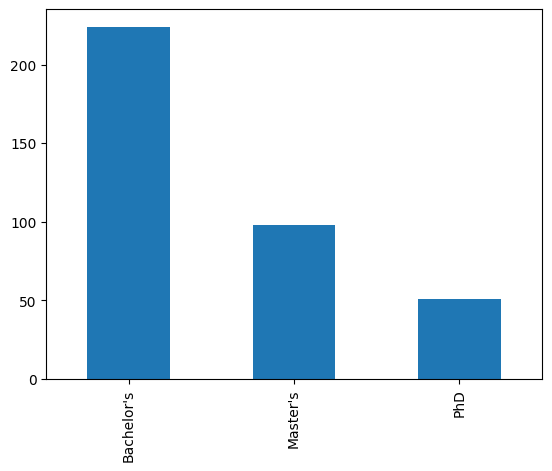

In [ ]:
df['Education Level'].value_counts().plot(kind='bar')
plt.show

* Observation:

 As we can see, we have more number of people who have done Bachelor's and less number of people who have done PhD and that is practical too.

In [ ]:
df['Job Title'].nunique()

174

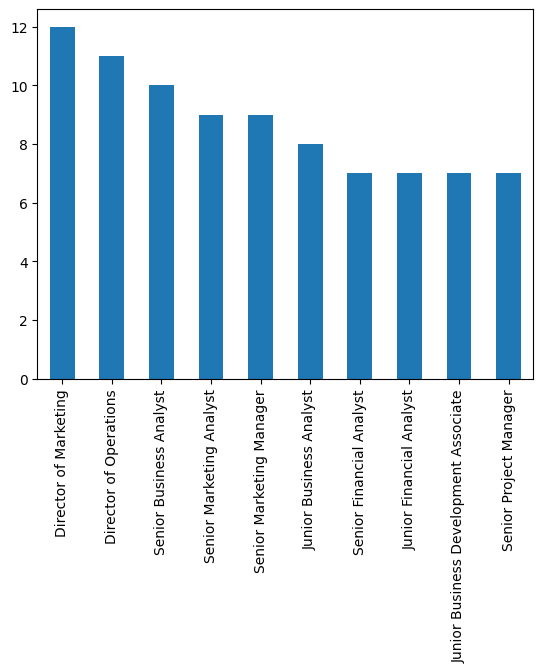

In [ ]:
df['Job Title'].value_counts().head(10).plot(kind='bar')
plt.show()

* Obsevation : Here,we get Top 10 Job Titles

<Axes: >

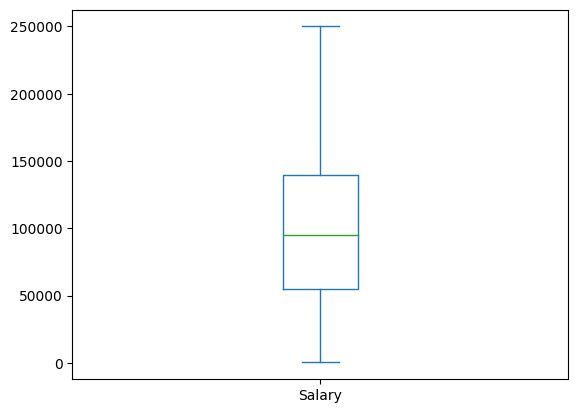

In [ ]:
#BOXPLOT
df['Salary'].plot(kind='box')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


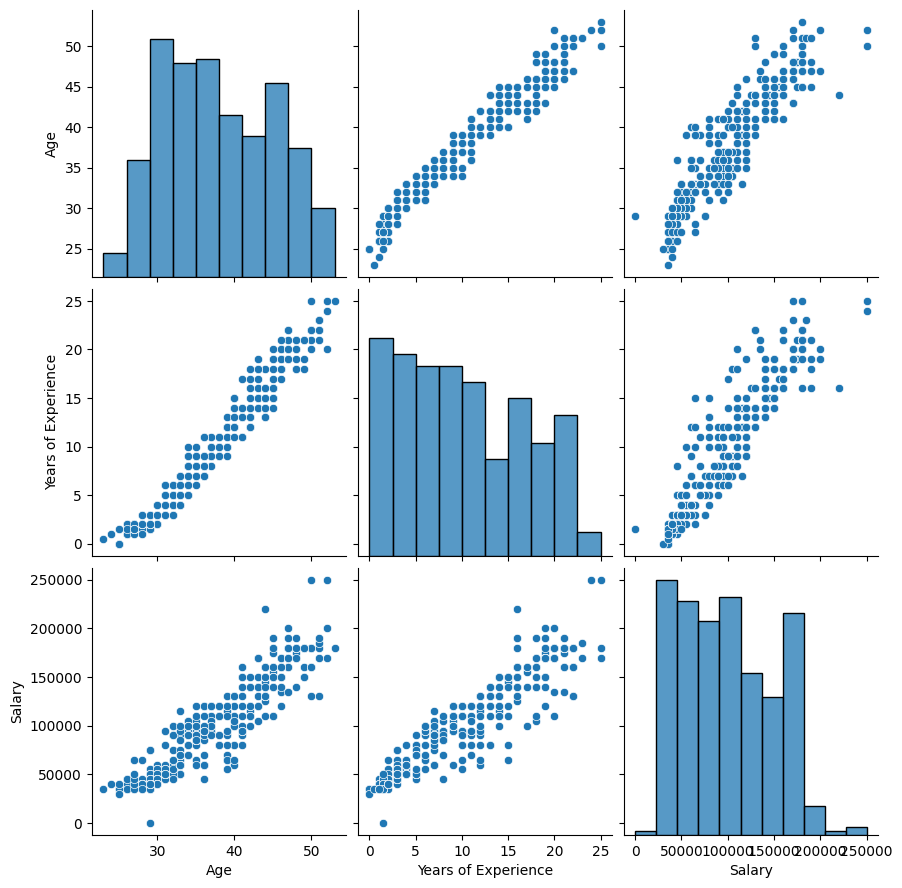

In [ ]:
# PAIRPLOT
sns.pairplot(df,size=3)

<ipython-input-69-0fff0502b623>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

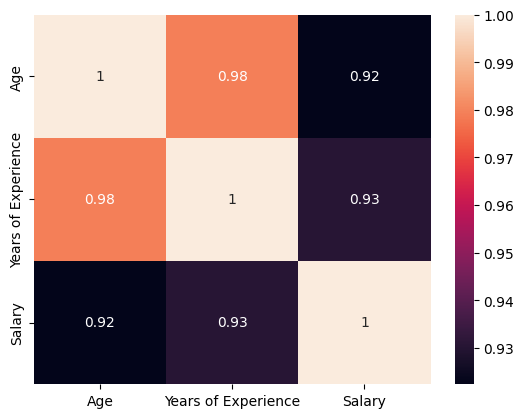

In [ ]:
# HEATMAP
sns.heatmap(df.corr(),annot=True)

In [ ]:
cat = ["Gender","Education Level","Job Title"]

In [ ]:
data = pd.get_dummies(columns=cat,drop_first=True,data=df)

In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
data.head()

,Age,Years of Experience,Salary,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,3.0,65000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,150000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,7.0,60000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,20.0,200000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# MACHINE LEARNING :---------->

# Data Preprocessing

In [ ]:
X = data.drop("Salary",axis=1)
y = data["Salary"]

# Splitting Dataset

In [ ]:
#from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Model Building(choosing,Fitting,Training,Testing)

In [ ]:
#from sklearn.svm import SVR
model = SVR()

In [ ]:
model.fit(X_train,y_train)

SVR()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([94974.71574788, 94984.96256108, 94991.38336089, 94980.49794881,
       94980.5644711 , 94984.96360014, 95035.65573051, 94989.78943292,
       94998.25174233, 95025.02270897, 94989.78696149, 94978.52464843,
       95044.55660758, 95000.0393229 , 94999.98293269, 95042.35348889,
       94981.97856793, 94983.50259265, 95026.73371186, 94991.56460093,
       95037.29682363, 95026.73031278, 95000.09835381, 95028.40045681,
       95018.14640923, 94991.50174907, 94979.09312369, 94989.73697164,
       95038.67189951, 95024.72995107, 94979.1577781 , 94989.77543242,
       94986.56516725, 95024.90271186, 94993.11898094, 95026.60243219,
       95000.09022258, 95037.30917145, 95028.31569808, 94988.23841909,
       94996.51378924, 94994.77765232, 94989.77791344, 95012.72211229,
       94999.97928312, 95001.82810106, 94998.25677881, 95019.79723755,
       94999.97928312, 94986.45605186, 95029.96676741, 94996.57480638,
       95047.21056168, 95024.99979074, 94998.39850397, 94977.79481681,
      

In [ ]:
y_test

174     45000.0
206     50000.0
70      65000.0
118     45000.0
32      75000.0
         ...   
305     95000.0
3       60000.0
274     40000.0
163     80000.0
294    140000.0
Name: Salary, Length: 75, dtype: float64

# Perfomance Metrics

In [ ]:
#from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.0037161843080291135

In [ ]:
mean_absolute_error(y_test,y_pred)

36783.95786714535

In [ ]:
mean_squared_error(y_test,y_pred)

2067583964.3014338